<a href="https://colab.research.google.com/github/aburak256/Currency-with-Twitter/blob/main/Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pickle
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

from metrics import evaluate
from plots import bar_metrics


warnings.filterwarnings("ignore") #We will use deprecated models of statmodels which throw a lot of warnings to use more modern ones
plt.style.use('bmh')
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'
mpl.rcParams['figure.figsize'] = 18, 8

with open('scores.pickle', 'rb') as handle:
    resultsDict = pickle.load(handle)

## Load our results from the model notebook
with open('predictions.pickle', 'rb') as handle:
    predictionsDict = pickle.load(handle)

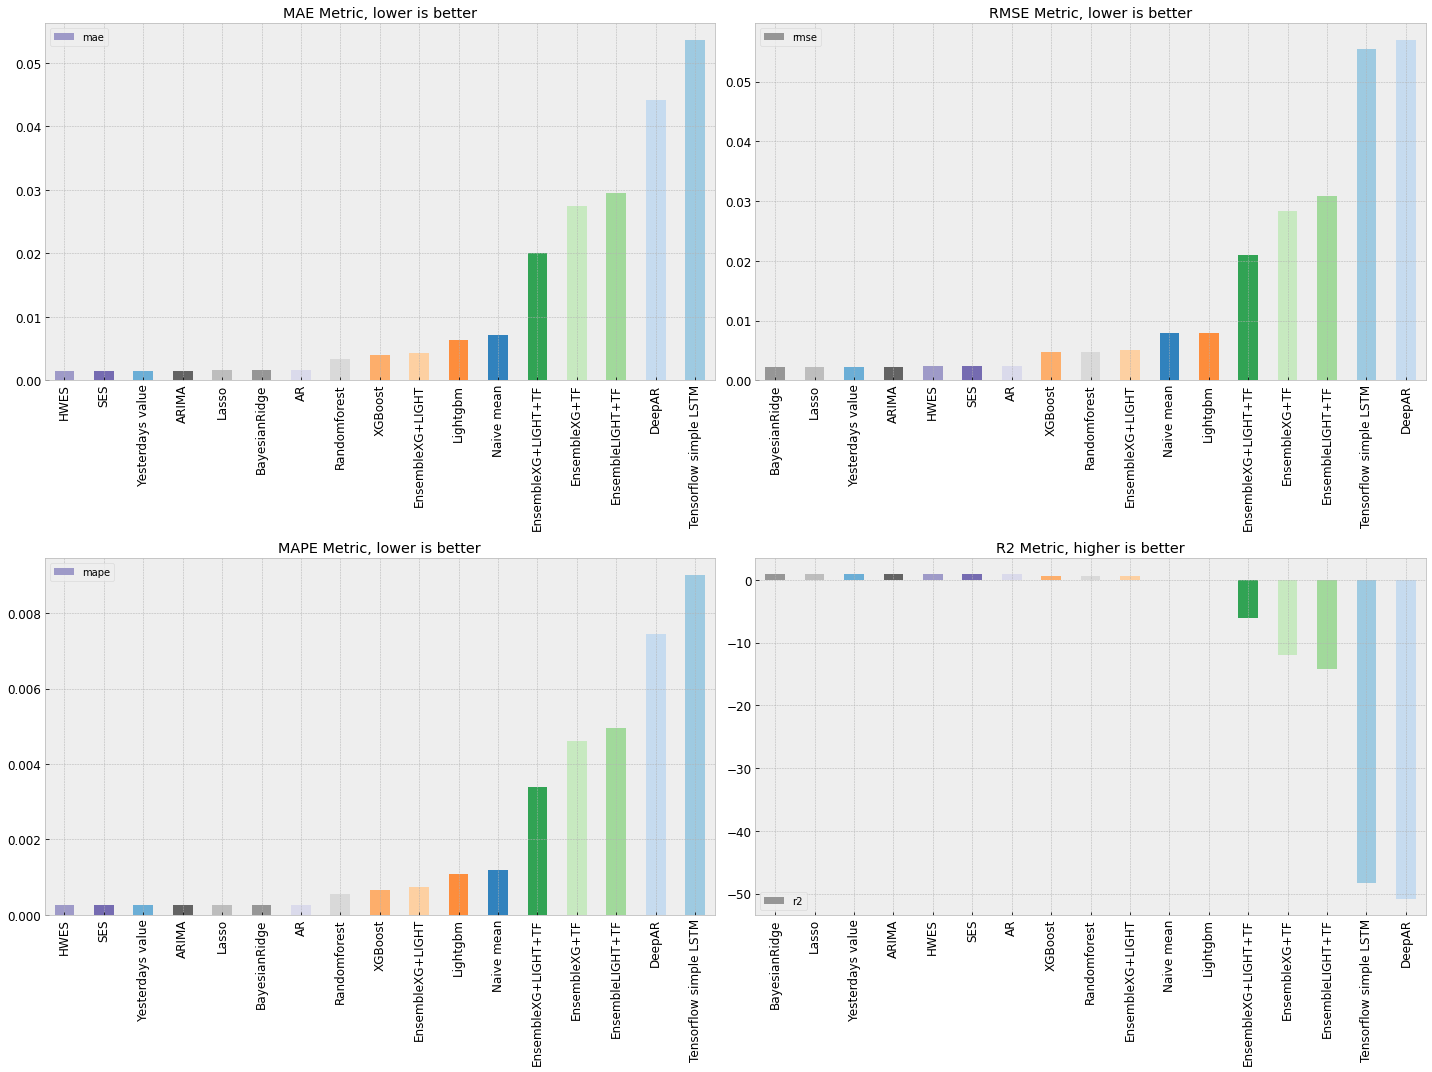

In [9]:
bar_metrics(resultsDict)

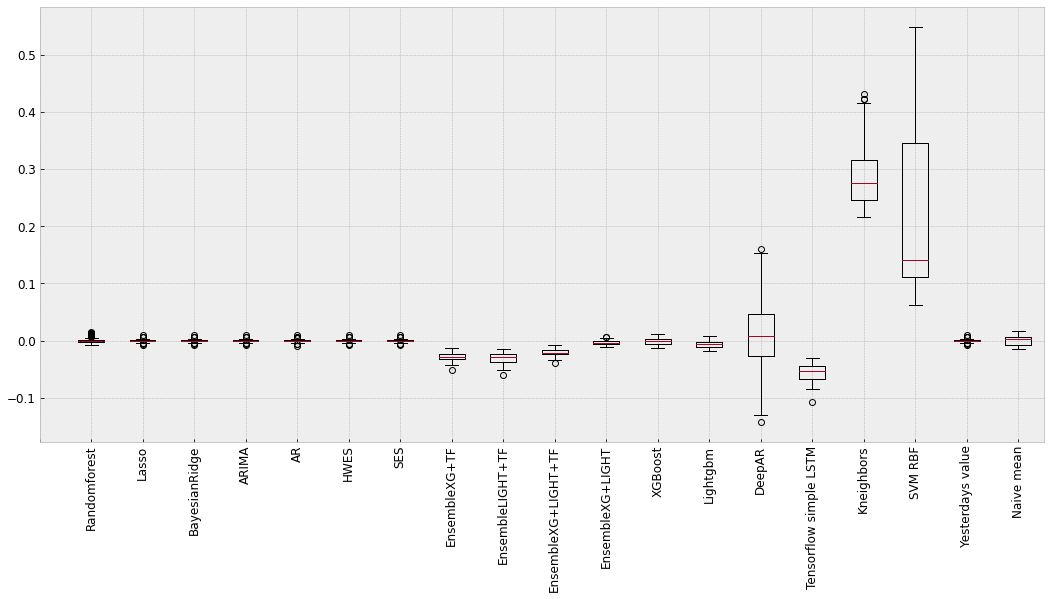

In [10]:
df_test = pd.read_csv("test.csv")
residuals = [df_test.Rate.values - predictionsDict[u] for u in predictionsDict.keys()]
residuals.reverse()
plt.boxplot(residuals)
ticks = list(predictionsDict.keys())
ticks.reverse()
ticks = [''] + ticks
rang = range(0,len(ticks))
plt.xticks(rang, ticks,rotation='vertical')
pass

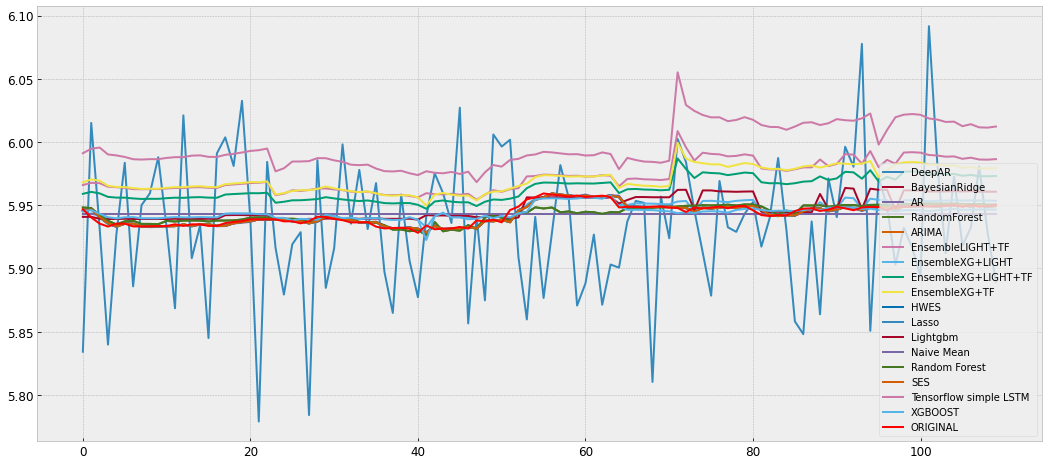

In [28]:
plt.plot(predictionsDict['DeepAR'], label='DeepAR')
plt.plot(predictionsDict['BayesianRidge'],label='BayesianRidge')
plt.plot(predictionsDict['AR'],label='AR')
plt.plot(predictionsDict['Randomforest'],label='RandomForest')
plt.plot(predictionsDict['ARIMA'], label='ARIMA')
plt.plot(predictionsDict['EnsembleLIGHT+TF'], label='EnsembleLIGHT+TF')
plt.plot(predictionsDict['EnsembleXG+LIGHT'], label='EnsembleXG+LIGHT')
plt.plot(predictionsDict['EnsembleXG+LIGHT+TF'],label='EnsembleXG+LIGHT+TF')
plt.plot(predictionsDict['EnsembleXG+TF'], label='EnsembleXG+TF')
plt.plot(predictionsDict['HWES'], label='HWES')
plt.plot(predictionsDict['Lasso'], label='Lasso')
plt.plot(predictionsDict['Lightgbm'], label='Lightgbm')
plt.plot(predictionsDict['Naive mean'], label='Naive Mean')
plt.plot(predictionsDict['Randomforest'], label='Random Forest')
plt.plot(predictionsDict['SES'], label='SES')
plt.plot(predictionsDict['Tensorflow simple LSTM'], label='Tensorflow simple LSTM')
plt.plot(predictionsDict['XGBoost'], label='XGBOOST')
plt.plot(predictionsDict['ORIGINAL'], color ='red' , label = 'ORIGINAL')
plt.legend()